In [1]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

In [2]:
data=pd.read_csv('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/동계인턴십_Data_1000/phenotype_1000.txt',engine="python",sep=" ")

In [3]:
df=data.loc[:,['AGE_B', 'SMOK_B', 'ALCO_B','EXER_B','HT_B', 'WT_B', 'WAIST_B', 'SBP_B', 'DBP_B', 'CHO_B','LDL_B', 'TG_B', 'HDL_B', 'FBS_B', 'GOT_B', 'GPT_B', 'GGT_B', 'URIC_B','BIL', 'WBC', 'CREAT', 'STOMA', 'COLON', 'LIVER', 'LUNG','PROST', 'THROI', 'BREAC', 'RECTM','SEX1', 'CRC']]
df.head()

,AGE_B,SMOK_B,ALCO_B,EXER_B,HT_B,WT_B,WAIST_B,SBP_B,DBP_B,CHO_B,...,STOMA,COLON,LIVER,LUNG,PROST,THROI,BREAC,RECTM,SEX1,CRC
0,48,3.0,2.0,1.0,168.0,69.8,82.0,102.0,69.0,196.0,...,0,0,0,0,0,0,0,0,1,0
1,53,1.0,2.0,1.0,161.0,67.9,86.0,127.0,67.0,159.0,...,0,0,0,0,0,0,1,0,2,0
2,60,1.0,1.0,2.0,153.0,73.3,97.0,133.0,76.0,198.0,...,0,0,0,0,0,0,0,0,2,0
3,42,1.0,2.0,2.0,167.0,65.1,77.5,97.0,70.0,139.0,...,1,0,0,0,0,0,0,0,1,0
4,57,3.0,2.0,2.0,165.0,51.8,73.0,98.0,76.0,166.0,...,0,0,0,0,0,0,0,0,1,0


In [5]:

import seaborn as sns
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(df.corr(), annot=True, fmt = '.1f', ax = ax)

NameError: name 'plt' is not defined

In [ ]:
df.dropna(inplace=True)

train/test data set 분할
먼저 전체 데이터 프레임에서 타겟값을 제외한 나머지 columns을 X_df로 설정하고, LUNG을 y_df로 설정한다.

In [ ]:
#폐암 
features=['LUNG','STOMA','COLON','LIVER','PROST','THROI','BREAC','RECTM']
y_df =df['LUNG']
X_df =df.drop(features, axis=1)

<AxesSubplot:>

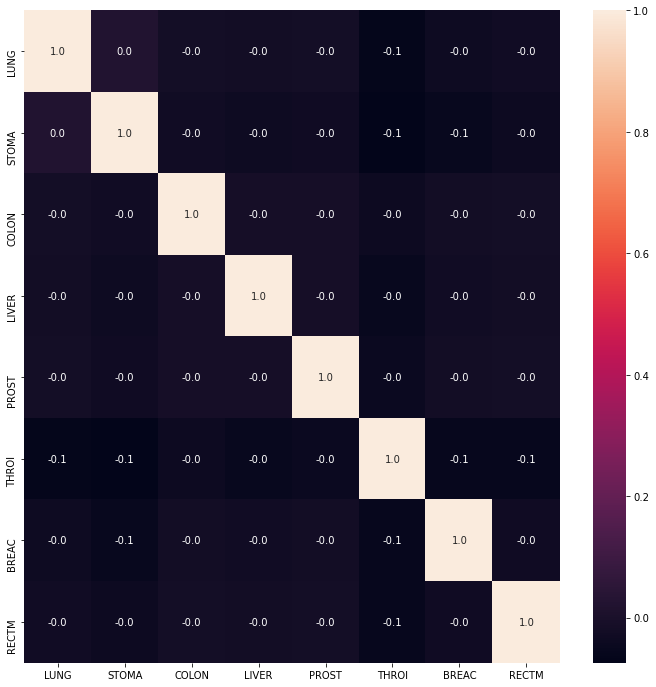

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(df[features].corr(), annot=True, fmt = '.1f', ax = ax)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#분류 모델
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix,classification_report #정오분류표
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score #정확도,민감도
from sklearn.metrics import roc_curve, auc #ROC 곡선 그리기

#최적화
from sklearn.model_selection import learning_curve,validation_curve #학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV #하이퍼파라미터 튜닝
from sklearn.model_selection import cross_val_score #교차타당도 #추가

투표 기법 사용

In [ ]:
logistic = LogisticRegression(solver='liblinear',penalty='l2')
tree = DecisionTreeClassifier(max_depth=None,criterion='entropy')
knn = KNeighborsClassifier(n_neighbors=1,p=2,metric='minkowski')
forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
voting_estimators = [('logistic',logistic),('tree',tree),('knn',knn)]
voting = VotingClassifier(estimators=voting_estimators,voting='soft')
#소프트 보팅 이용 (분류기들의 레이블)
#투표 기법 사용
a_clf_labels = ['Logistic regression','Decision tree','KNN','Majority voting']
a_all_clf = [logistic,tree,knn,voting]

#배깅
b_clf_labels = ['Decision tree','Random forest']
b_all_clf = [tree,forest]

#부스팅
c_clf_labels = ['Decision tree','Ada boost']
c_all_clf = [tree,adaboost]

In [ ]:
for clf, label in zip(a_all_clf,a_clf_labels):
    scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc')
    print('ROC AUC: %0.3f (sd : %0.3f),[%s]' %(scores.mean(),scores.std(),label))

ROC AUC: 0.757 (sd : 0.181),[Logistic regression]
ROC AUC: 0.529 (sd : 0.103),[Decision tree]
ROC AUC: 0.536 (sd : 0.102),[KNN]
ROC AUC: 0.777 (sd : 0.124),[Majority voting]


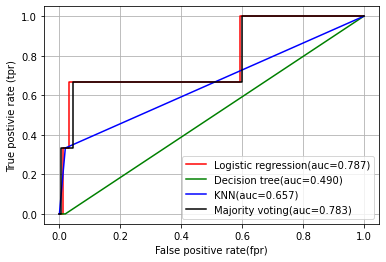

In [ ]:
colors=['r','g','b','black']
for clf,label,clr in zip(a_all_clf,a_clf_labels,colors):
    clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    roc_auc=auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,color=clr,label='%s(auc=%0.3f)'%(label,roc_auc))

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('False positive rate(fpr)')
plt.ylabel('True postivie rate (tpr)')
plt.show()

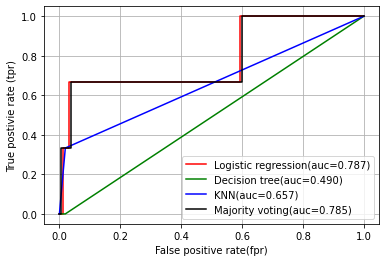

In [ ]:
colors=['r','g','b','black']
for clf,label,clr in zip(a_all_clf,a_clf_labels,colors):
    clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    roc_auc=auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,color=clr,label='%s(auc=%0.3f)'%(label,roc_auc))

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('False positive rate(fpr)')
plt.ylabel('True postivie rate (tpr)')
plt.show()

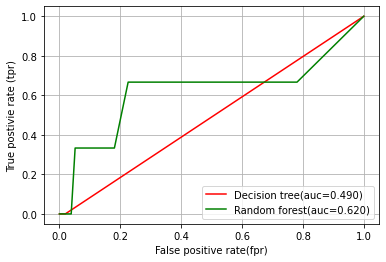

In [ ]:
colors=['r','g']
for clf,label,clr in zip(b_all_clf,b_clf_labels,colors):
    clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    roc_auc=auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,color=clr,label='%s(auc=%0.3f)'%(label,roc_auc))

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('False positive rate(fpr)')
plt.ylabel('True postivie rate (tpr)')
plt.show()

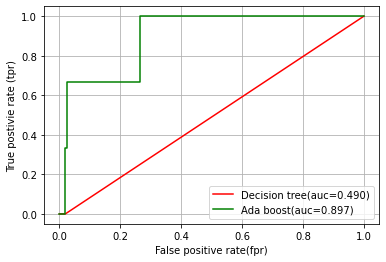

In [ ]:
colors=['r','g']
for clf,label,clr in zip(c_all_clf,c_clf_labels,colors):
    clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    roc_auc=auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,color=clr,label='%s(auc=%0.3f)'%(label,roc_auc))

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('False positive rate(fpr)')
plt.ylabel('True postivie rate (tpr)')
plt.show()

randomforest의 경우의 중요도를 선택하였다.

In [ ]:
feat_labels= X_df.columns
importance =forest.feature_importances_
indices=np.argsort(importance)[::-1]
for f in range(X_train.shape[1]):
    print("%3d) %-*s %f" %(f+1,30,feat_labels[indices[f]],importance[indices[f]]))

  1) AGE_B                          0.106177
  2) SBP_B                          0.069888
  3) WT_B                           0.068185
  4) GPT_B                          0.060324
  5) BIL                            0.058425
  6) GOT_B                          0.055673
  7) HDL_B                          0.052703
  8) LDL_B                          0.051954
  9) FBS_B                          0.049434
 10) TG_B                           0.048669
 11) WBC                            0.046386
 12) URIC_B                         0.046258
 13) HT_B                           0.046198
 14) CHO_B                          0.043647
 15) DBP_B                          0.041626
 16) WAIST_B                        0.041596
 17) CREAT                          0.035550
 18) GGT_B                          0.030770
 19) SMOK_B                         0.024225
 20) EXER_B                         0.009070
 21) ALCO_B                         0.006714
 22) SEX1                           0.005384
 23) CRC  

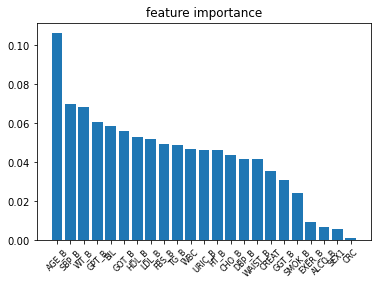

In [ ]:
plt.bar(range(X_train.shape[1]),importance[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=45,size=8)
plt.title('feature importance')
plt.show()

중요도 0.05 까지만 잘라서 시행해봤다.

In [ ]:
#폐암 
features=['LUNG','STOMA','COLON','LIVER','LUNG','PROST','THROI','BREAC','RECTM']
y_df =df['LUNG']
#X_df =df.drop(features, axis=1)
X_df =df[['AGE_B','GOT_B','SBP_B','LDL_B','HDL_B','DBP_B','CHO_B','WT_B','FBS_B','GPT_B']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(630, 10) (158, 10)


In [ ]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 500

In [ ]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[01:08:08] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60923	eval-logloss:0.60765
[1]	train-logloss:0.54068	eval-logloss:0.53720
[2]	train-logloss:0.48331	eval-logloss:0.47776
[3]	train-logloss:0.43502	eval-logloss:0.42800
[4]	train-logloss:0.39360	eval-logloss:0.38523
[5]	train-logloss:0.35772	eval-logloss:0.34868
[6]	train-logloss:0.32702	eval-logloss:0.31687
[7]	train-logloss:0.30010	eval-logloss:0.28914
[8]	train-logloss:0.27678	eval-logloss:0.26491
[9]	train-logloss:0.25569	eval-logloss:0.24347
[10]	train-logloss:0.23766	eval-logloss:0.22481
[11]	train-logloss:0.22176	eval-logloss:0.20834
[12]	train-logloss:0.20771	eval-logloss:0.19373
[13]	train-logloss:0.19501	eval-logloss:0.18105
[14

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.024 0.    0.001 0.001 0.001 0.    0.352 0.001 0.    0.   ]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(y_test, preds)

오차행렬:
 [[156   0]
 [  2   0]]

정확도: 0.9873
정밀도: 0.0000
재현율: 0.0000
F1: 0.0000
AUC: 0.5000


C:\Users\dudtj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [ ]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [ ]:
print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

630 158


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

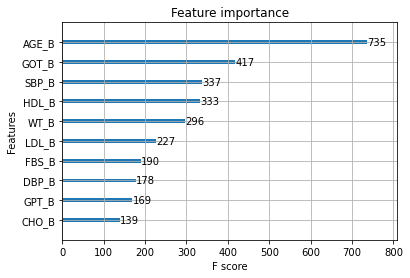

In [ ]:
xgboost.plot_importance(xgb_model)

In [ ]:
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.02469246000859276

In [ ]:
# accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.84%


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [ ]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 21, number of negative: 609
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 630, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033333 -> initscore=-3.367296
[LightGBM] [Info] Start training from score -3.367296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
y_pred=clf.predict(X_test)
#convert into binary values
for i in range(0,99):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

ValueError: Classification metrics can't handle a mix of binary and continuous targets